#  ETL PROJECT

Analyzing Economic Freedom Data of the latest year and how internal factors(income group,population,etc) and external factor(tourist count) affecting the economic freedom score.Here we have taken three csv files to do this analysis.
The sources of data that we have extracted from are given below.The cleaned datas are joined and the final data is loading to the Relational Database Management System -Postgresql GUI administration tool PgAdmin.

######  step1: Extracting data
###### step 2: Cleaning csv file   "tourism_data_1.csv"   and  creating dataframe   "tourism_df1_clean"
###### step 3: Cleaning csv file   "tourism_data_2.csv"   and  creating dataframe   "tourism_df2_clean"
###### step 4: Cleaning csv file   "mini_project_economic_freedom.csv" and  creating dataframe   "economic_df_clean"
###### step 5: Joining dataframes   "tourism_df1_clean" and  "tourism_df2_clean"  and  making a single dataframe called   "merge_with_replace"
###### step 6: Joining dataframes   "economic_df_clean"  and  "merge_with_replace"  to get the final dataframe   "final_data_to_load" .
###### step 7: Creating html file from final data(final_data_to_load).
###### step 8: Connection to database(RDBMS)-POSTGRESQL
###### step 9: Create table in database to load the data from jupyter notebook by creating a sql file.
###### step 10: Check for table "etl_economic_freedom"
###### step 10: By using pandas we are Loading the final data   "final_data_to_load"  to the relational database table "etl_economic_freedom".
###### step 11: Confirm data has been added by querying the table .
###### step 12: Creating some plots by using  the data we are taken from the database table  "etl_economic_freedom" by using query.

In [166]:
# DEPENDENCIES AND SETUP

import pandas as pd
import databaseconfig as cfg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine

###  EXTRACT DATA: 
This project uses two source of data:- 
##### URL   https://data.worldbank.org/indicator/ST.INT.ARVL
##### URL  https://www.kaggle.com/lewisduncan93/the-economic-freedom-index



###  TRANSFORM DATA

In [125]:
# Specifying csv file paths

csv_path_1 = "data/tourism_data_1.csv"
csv_path_2 = "data/tourism_data_2.csv"
csv_path_3 = "data/mini_project_economic_freedom.csv"


####  1. Data Clean Up -  "tourism_data_1.csv"

In [126]:
# Reading csv file "tourism_data_1.csv" and skiping first 4 rows

tourism_df1 = pd.read_csv(csv_path_1, skiprows=4)
tourism_df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,813000.0,824000.0,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,NaN
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,366000.0,425000.0,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,NaN
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1711000.0,2191000.0,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,NaN
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1830000.0,1808000.0,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2831000.0,NaN,NaN


In [127]:
# Considering the required columns by using copy function

tourism_df1_col = tourism_df1[["Country Name","Country Code","2017"]].copy()
tourism_df1_col.head()


,Country Name,Country Code,2017
0,Aruba,ABW,1070500.0
1,Afghanistan,AFG,NaN
2,Angola,AGO,261000.0
3,Albania,ALB,4643000.0
4,Andorra,AND,NaN


In [128]:
# Renaming the columns
# Deleting the rows which are not a number by dropna function
# Reseting index

tourism_df1_clean= tourism_df1_col.rename(columns = {"Country Name": "country","Country Code": "country_code","2015": "tourist_count_2015","2016": "tourist_count_2016","2017": "tourist_count_2017"}).dropna().reset_index(drop= True)
tourism_df1_clean.head()



,country,country_code,tourist_count_2017
0,Aruba,ABW,1070500.00
1,Angola,AGO,261000.00
2,Albania,ALB,4643000.00
3,Arab World,ARB,82214598.63
4,Argentina,ARG,6720000.00


#####  2. Data Clean Up - "tourism_data_2.csv"

In [129]:
# Reading csv file "tourism_data_2.csv" 

tourism_df2 = pd.read_csv(csv_path_2)
tourism_df2.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [130]:
# Considering the required columns by using copy function

tourism_df2_col = tourism_df2[["Country Code","IncomeGroup"]].copy()
tourism_df2_col.head()

,Country Code,IncomeGroup
0,ABW,High income
1,AFG,Low income
2,AGO,Lower middle income
3,ALB,Upper middle income
4,AND,High income


In [131]:
# Renaming the columns
# Deleting the rows which are not a number by dropna function
# Reseting index



tourism_df2_clean= tourism_df2_col.rename(columns = {"Country Code": "country_code", "IncomeGroup": "income_group"}).dropna().reset_index(drop=True)
tourism_df2_clean.head()

,country_code,income_group
0,ABW,High income
1,AFG,Low income
2,AGO,Lower middle income
3,ALB,Upper middle income
4,AND,High income


#####  3. Data Clean Up - "mini_project_economic_freedom.csv"

In [132]:
# Reading csv file "mini_project_economic_freedom.csv"

economic_df = pd.read_csv(csv_path_3)
economic_df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.60,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.00,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.90,2.0,3.1,"$15,237",10,5.6,"1,203.00",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.30,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.20,2.9,0.7,"$20,876",8.7,25.7,"11,857.00",52.6


In [133]:
# Considering the required columns by using copy function

economic_df_col = economic_df[["Country Name","Region", "World Rank","2019 Score", "Population (Millions)","Unemployment (%)"]].copy()
economic_df_col.head()

,Country Name,Region,World Rank,2019 Score,Population (Millions),Unemployment (%)
0,Afghanistan,Asia-Pacific,152.0,51.5,35.5,8.8
1,Albania,Europe,52.0,66.5,2.9,13.9
2,Algeria,Middle East and North Africa,171.0,46.2,41.5,10
3,Angola,Sub-Saharan Africa,156.0,50.6,28.2,8.2
4,Argentina,Americas,148.0,52.2,44.1,8.7


In [134]:
# Renaming the columns
# Deleting the rows which are not a number by dropna function
# Reseting index


economic_df_clean= economic_df_col.rename(columns = {"Country Name": "country","Region": "region", "World Rank": "world_rank","2019 Score": "economic_freedom_score","Population (Millions)": "population_in_millions","Unemployment (%)": "unemployment_in_percent"}).dropna().sort_values('world_rank').reset_index(drop=True)

economic_df_clean.head()


,country,region,world_rank,economic_freedom_score,population_in_millions,unemployment_in_percent
0,Hong Kong,Asia-Pacific,1.0,90.2,7.4,3.1
1,Singapore,Asia-Pacific,2.0,89.4,5.6,2
2,New Zealand,Asia-Pacific,3.0,84.4,4.8,4.9
3,Switzerland,Europe,4.0,81.9,8.4,4.8
4,Australia,Asia-Pacific,5.0,80.9,24.8,5.6


######  1.  Join Dataframes   "tourism_df1_clean"   and    "tourism_df2_clean"

In [135]:
merge_df1_df2 = pd.merge(tourism_df1_clean, tourism_df2_clean, on='country_code', how='inner')
merge_df1_df2.head()

,country,country_code,tourist_count_2017,income_group
0,Aruba,ABW,1070500.0,High income
1,Angola,AGO,261000.0,Lower middle income
2,Albania,ALB,4643000.0,Upper middle income
3,Argentina,ARG,6720000.0,Upper middle income
4,Armenia,ARM,1495000.0,Upper middle income


In [136]:
# Creating datframe with columns "country","tourist_count_2017" and "income_group"
# Then sort by column "country"

merge_new = merge_df1_df2[["country","tourist_count_2017","income_group"]].copy().sort_values('country')
#pd.set_option('display.max_rows', 500)

merge_new.head()


,country,tourist_count_2017,income_group
2,Albania,4643000.0,Upper middle income
45,Algeria,2451000.0,Upper middle income
5,American Samoa,20000.0,Upper middle income
1,Angola,261000.0,Lower middle income
6,Antigua and Barbuda,247000.0,High income


In [137]:
# Mapping dictonary for countries with different name format in two data files

dic = {"Bahamas, The":"Bahamas",	
"Congo, Rep.":"Congo, Republic of",
"Cote d'Ivoire":"Côte d'Ivoire",
"Egypt, Arab Rep.":"Egypt",	
"Gambia, The":"Gambia",
"Hong Kong SAR, China":"Hong Kong",	
"Iran, Islamic Rep.":"Iran",
"Korea, Rep.":"Korea, South",
"Lao PDR":"Laos",
"Macao SAR, China":"Macau",
"North Macedonia":"Macedonia",
"Russian Federation":"Russia",
"St. Lucia":"Saint Lucia",
"St. Vincent and the Grenadines":"Saint Vincent and the Grenadines"}

#dic

In [138]:
# Replacing the matching country names in the dataframe "merge_new" with country names in the dicitionary "dic"

merge_with_replace = merge_new.replace({"country": dic})
merge_with_replace.head()
#merge_with_replace

,country,tourist_count_2017,income_group
2,Albania,4643000.0,Upper middle income
45,Algeria,2451000.0,Upper middle income
5,American Samoa,20000.0,Upper middle income
1,Angola,261000.0,Lower middle income
6,Antigua and Barbuda,247000.0,High income


######  2. Join Dataframes   "economic_df_clean"  and   "merge_with_replace"

######  FINAL DATA  WHICH IS LOADING TO DATABASE

In [139]:
# Merge Dataframes "economic_df_clean" and "merge_with_replace"

final_data_to_load = pd.merge(economic_df_clean, merge_with_replace, on='country', how='inner')
final_data_to_load.head()
pd.set_option('display.max_rows', 500)
final_data_to_load

,country,region,world_rank,economic_freedom_score,population_in_millions,unemployment_in_percent,tourist_count_2017,income_group
0,Hong Kong,Asia-Pacific,1.0,90.2,7.4,3.1,27884000.0,High income
1,Singapore,Asia-Pacific,2.0,89.4,5.6,2,13903000.0,High income
2,New Zealand,Asia-Pacific,3.0,84.4,4.8,4.9,3555000.0,High income
3,Switzerland,Europe,4.0,81.9,8.4,4.8,9889000.0,High income
4,Australia,Asia-Pacific,5.0,80.9,24.8,5.6,8815000.0,High income
5,Ireland,Europe,6.0,80.5,4.7,6.4,10338000.0,High income
6,United Kingdom,Europe,7.0,78.9,66.1,4.3,37651000.0,High income
7,Canada,Americas,8.0,77.7,36.7,6.3,20798000.0,High income
8,Iceland,Europe,11.0,77.1,0.3,2.8,2225000.0,High income
9,United States,Americas,12.0,76.8,325.9,4.4,76941000.0,High income


### CREATING HTML FILE  FROM FINAL DATA

In [140]:
final_data_to_load.to_html('complete_economic_freedom_data_table.html', index= False)

###  CONNECTION TO LOCAL DATABASE - RDBMS (postgresql)

In [141]:
engine = create_engine('postgresql://' + cfg.postgresql['user'] + ':' + cfg.postgresql['password']
                       + '@' + cfg.postgresql['host'] + ':5432/' + cfg.postgresql['db'])

connection = engine.connect()

print(f"connected to database")

connected to database


###  CHECK FOR TABLES

In [142]:
engine.table_names()

['etl_economic_freedom']

## Use pandas to load csv converted DataFrame into database

In [143]:
final_data_to_load.to_sql(name='etl_economic_freedom', con=engine, if_exists='replace', index=False)



##  Confirm data has been added by querying the table  "etl_economic_freedom"

In [163]:
eco_df = pd.read_sql_query('select * from etl_economic_freedom', con=engine)
eco_df


,country,region,world_rank,economic_freedom_score,population_in_millions,unemployment_in_percent,tourist_count_2017,income_group
0,Hong Kong,Asia-Pacific,1.0,90.2,7.4,3.1,27884000.0,High income
1,Singapore,Asia-Pacific,2.0,89.4,5.6,2,13903000.0,High income
2,New Zealand,Asia-Pacific,3.0,84.4,4.8,4.9,3555000.0,High income
3,Switzerland,Europe,4.0,81.9,8.4,4.8,9889000.0,High income
4,Australia,Asia-Pacific,5.0,80.9,24.8,5.6,8815000.0,High income
5,Ireland,Europe,6.0,80.5,4.7,6.4,10338000.0,High income
6,United Kingdom,Europe,7.0,78.9,66.1,4.3,37651000.0,High income
7,Canada,Americas,8.0,77.7,36.7,6.3,20798000.0,High income
8,Iceland,Europe,11.0,77.1,0.3,2.8,2225000.0,High income
9,United States,Americas,12.0,76.8,325.9,4.4,76941000.0,High income


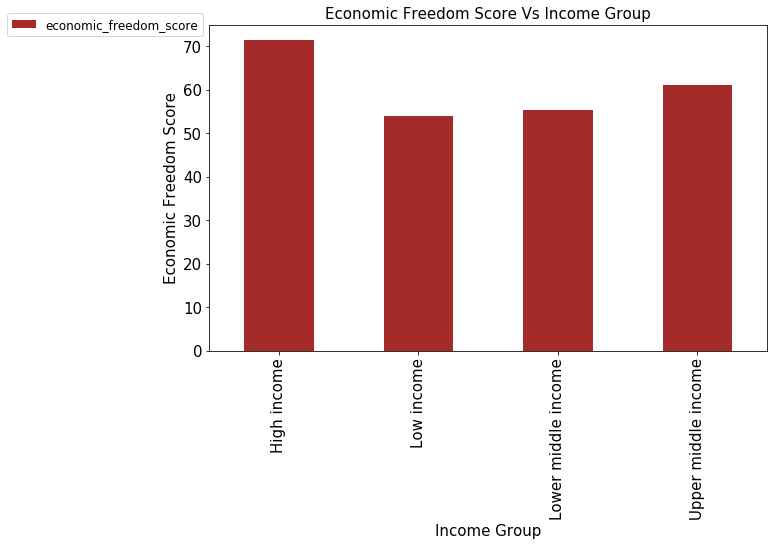

In [147]:
# Plotting  economic freedom score vs income group

Eco_Income = pd.pivot_table(eco_df, index = 'income_group', values = 'economic_freedom_score')
Eco_Income.plot(kind = 'bar', color = "brown", figsize=(10,6), fontsize = 15, rot=90)

#set title
plt.title('Economic Freedom Score Vs Income Group', fontsize = 15)
#set legend
plt.legend(bbox_to_anchor=(0, 1), loc='right', ncol=1, fontsize = 12)
#set yaxis label
plt.ylabel('Economic Freedom Score', fontsize = 15)
# set xaxis label
plt.xlabel('Income Group', fontsize = 15)
# To save figure      
plt.savefig("plots/eco_income.png", bbox_inches="tight") 
# show figure
plt.show()


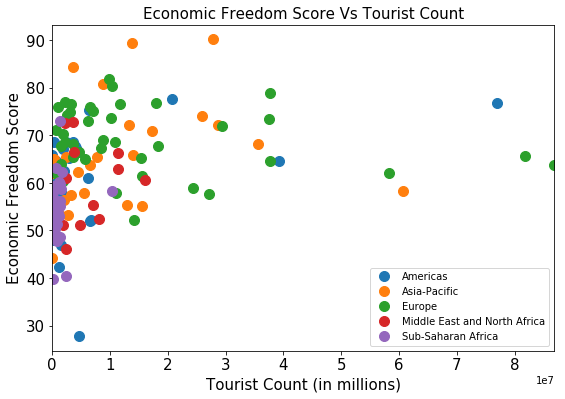

In [167]:
# Creating scatter plot based on 'Economic Freedom Score','Tourist Count ' and 'Region'
fig, ax = plt.subplots(figsize=(9,6))

# For loop is used  for ploting
# Do group by on dataframe "eco_df" based on column "Region"
# loop through all groups one by one
for name, group in eco_df.groupby('region'):
    group.plot(x='tourist_count_2017', y='economic_freedom_score', ax=ax, marker='o',
               linestyle='', ms=10, label=name, fontsize = 15)

#set margins
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
# set xaxis label
ax.set_xlabel('Tourist Count (in millions)', fontsize = 15)
# set yaxis label
ax.set_ylabel('Economic Freedom Score', fontsize = 15)
# set title
ax.set_title('Economic Freedom Score Vs Tourist Count', fontsize = 15)
ax.legend(fontsize = 10)

# save figure
plt.savefig("plots/scatter_plot_tourist.png", bbox_inches="tight")
# show figure
plt.show()

In [145]:
Top_Five = pd.read_sql_query('select * from etl_economic_freedom where world_rank < 6', con=engine)
Top_Five

,country,region,world_rank,economic_freedom_score,population_in_millions,unemployment_in_percent,tourist_count_2017,income_group
0,Hong Kong,Asia-Pacific,1.0,90.2,7.4,3.1,27884000.0,High income
1,Singapore,Asia-Pacific,2.0,89.4,5.6,2,13903000.0,High income
2,New Zealand,Asia-Pacific,3.0,84.4,4.8,4.9,3555000.0,High income
3,Switzerland,Europe,4.0,81.9,8.4,4.8,9889000.0,High income
4,Australia,Asia-Pacific,5.0,80.9,24.8,5.6,8815000.0,High income


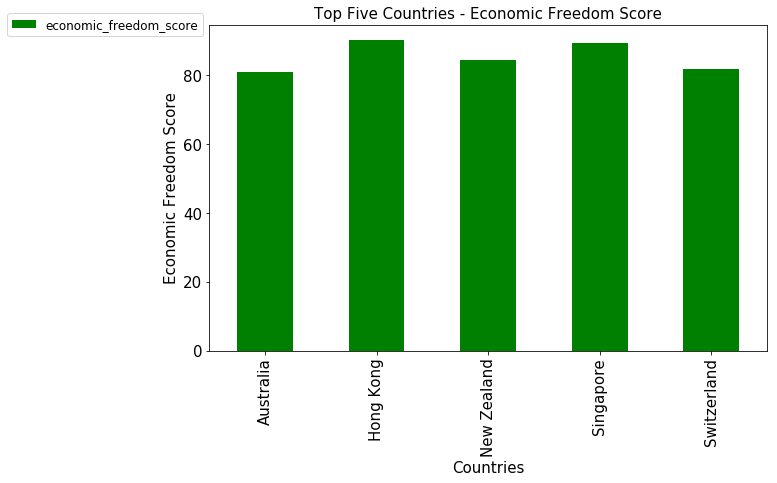

In [146]:
# Plotting the top Five countries economic freedom score 

Top_Five_Eco = pd.pivot_table(Top_Five, index = 'country', values = 'economic_freedom_score')
Top_Five_Eco.plot(kind = 'bar', color = "green", figsize=(10,6), fontsize = 15, rot=90)

#set title
plt.title('Top Five Countries - Economic Freedom Score', fontsize = 15)
#set legend
plt.legend(bbox_to_anchor=(0, 1), loc='right', ncol=1, fontsize = 12)
#set yaxis label
plt.ylabel('Economic Freedom Score', fontsize = 15)
# set xaxis label
plt.xlabel('Countries', fontsize = 15)
# To save figure      
plt.savefig("plots/eco_top_five.png", bbox_inches="tight") 
# show figure
plt.show()


###### Countries which have  high economic freedom score

In [89]:
high_economic_freedom_df = pd.read_sql_query("select * from etl_economic_freedom where economic_freedom_score > 75", con=engine)
high_economic_freedom_df

,country,region,world_rank,economic_freedom_score,population_in_millions,unemployment_in_percent,tourist_count_2017,income_group
0,Hong Kong,Asia-Pacific,1.0,90.2,7.4,3.1,27884000.0,High income
1,Singapore,Asia-Pacific,2.0,89.4,5.6,2.0,13903000.0,High income
2,New Zealand,Asia-Pacific,3.0,84.4,4.8,4.9,3555000.0,High income
3,Switzerland,Europe,4.0,81.9,8.4,4.8,9889000.0,High income
4,Australia,Asia-Pacific,5.0,80.9,24.8,5.6,8815000.0,High income
5,Ireland,Europe,6.0,80.5,4.7,6.4,10338000.0,High income
6,United Kingdom,Europe,7.0,78.9,66.1,4.3,37651000.0,High income
7,Canada,Americas,8.0,77.7,36.7,6.3,20798000.0,High income
8,Iceland,Europe,11.0,77.1,0.3,2.8,2225000.0,High income
9,United States,Americas,12.0,76.8,325.9,4.4,76941000.0,High income


In [104]:
high_economic_freedom_df.to_html('high_economic_freedom_table.html', index=False)

#####  Countries which have low economic freedom score

In [81]:
low_economic_freedom_df = pd.read_sql_query("select * from etl_economic_freedom where economic_freedom_score < 50", con=engine)
low_economic_freedom_df

,country,region,world_rank,economic_freedom_score,population_in_millions,unemployment_in_percent,tourist_count_2017,income_group
0,Chad,Sub-Saharan Africa,159.0,49.9,12.2,5.9,87000.0,Low income
1,Burundi,Sub-Saharan Africa,162.0,48.9,10.9,1.6,299000.0,Low income
2,Mozambique,Sub-Saharan Africa,163.0,48.6,29.5,25.0,1447000.0,Low income
3,Suriname,Americas,165.0,48.1,0.6,8.1,278000.0,Upper middle income
4,Sudan,Sub-Saharan Africa,166.0,47.7,40.8,12.7,813000.0,Lower middle income
5,Ecuador,Americas,170.0,46.9,16.8,3.8,1608000.0,Upper middle income
6,Algeria,Middle East and North Africa,171.0,46.2,41.5,10.0,2451000.0,Upper middle income
7,Timor-Leste,Asia-Pacific,172.0,44.2,1.2,3.4,74000.0,Lower middle income
8,Bolivia,Americas,173.0,42.3,11.1,3.1,1134000.0,Lower middle income
9,Zimbabwe,Sub-Saharan Africa,175.0,40.4,14.9,5.0,2423000.0,Lower middle income


In [105]:
low_economic_freedom_df.to_html('low_economic_freedom_table.html', index=False)

##  DATA ANALYSIS


After anlysis the data sets we come across the conclusion that Economic Freedom Score of countries depend upon the income group.As per the latest report Hong-Kong is the top most country with economic freedom score of 90.2 .
And the asia-pacific region have the highest economic score.

Majority of top most countries are from Europe and they have comparitively high income.
Sub-Saharan africa have comparitively low economic freedom score and they have mostly low or lower middle income.

High income group is comparitively more than other income groups and they their average economic freedom score is above 70.
And average economic freedom score of low income group is below 55.

Tourist count is higher in regions such as Europe and Asia-pacific where economic freedom score is good.
Sub-Saharn Africa region have low economic freedom so their tourist count is also low.